In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-icu-mortality-shap/__results__.html
/kaggle/input/predict-icu-mortality-shap/__notebook__.ipynb
/kaggle/input/predict-icu-mortality-shap/__output__.json
/kaggle/input/predict-icu-mortality-shap/icu_mortality_train.csv
/kaggle/input/predict-icu-mortality-shap/custom.css
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___63_13.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___72_0.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___39_0.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___63_7.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___79_0.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___63_17.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___31_0.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__results___86_0.png
/kaggle/input/predict-icu-mortality-shap/__results___files/__resul

# Loading the dataset

In [2]:
train=pd.read_csv('../input/predict-icu-mortality-shap/icu_mortality_train.csv')
train.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,PaCO2,PaO2,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death
0,137021.0,66.0,1.0,177.8,102.00,117.50,113.41,37.23,56.61,NaN,...,NaN,NaN,209.00,NaN,4.25,137.00,NaN,15.00,2.0,0
1,133611.0,50.0,1.0,NaN,92.40,210.51,85.93,38.04,58.60,126.69,...,41.00,175.00,243.33,88.02,4.38,144.00,0.51,6.88,4.0,0
2,137860.0,40.0,1.0,185.4,81.80,467.41,98.83,36.83,57.88,157.63,...,38.82,127.12,143.33,108.53,4.33,139.67,0.55,7.65,4.0,0
3,134781.0,58.0,1.0,180.3,99.22,86.55,81.63,36.96,49.64,113.86,...,46.20,147.60,109.60,78.06,4.07,137.75,0.58,13.50,2.0,0
4,133534.0,80.0,1.0,NaN,73.00,194.12,71.86,37.10,72.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,3.0,0


In [3]:
train.shape

(4000, 22)

# Missing Values Plot

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

missing=train.isna().sum().reset_index()
missing.columns=['features','total_missing']
missing['percent']=(missing['total_missing']/len(train))*100
missing.index=missing.features
del missing['features']

missing['total_missing'].iplot(kind='bar',title=f'<b>Missing Values Count in Dataset</b>',
                              xTitle='Features',colors='red',yTitle='Count')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [5]:
train['In-hospital_death'].value_counts()

0    3446
1     554
Name: In-hospital_death, dtype: int64

# Mortality Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



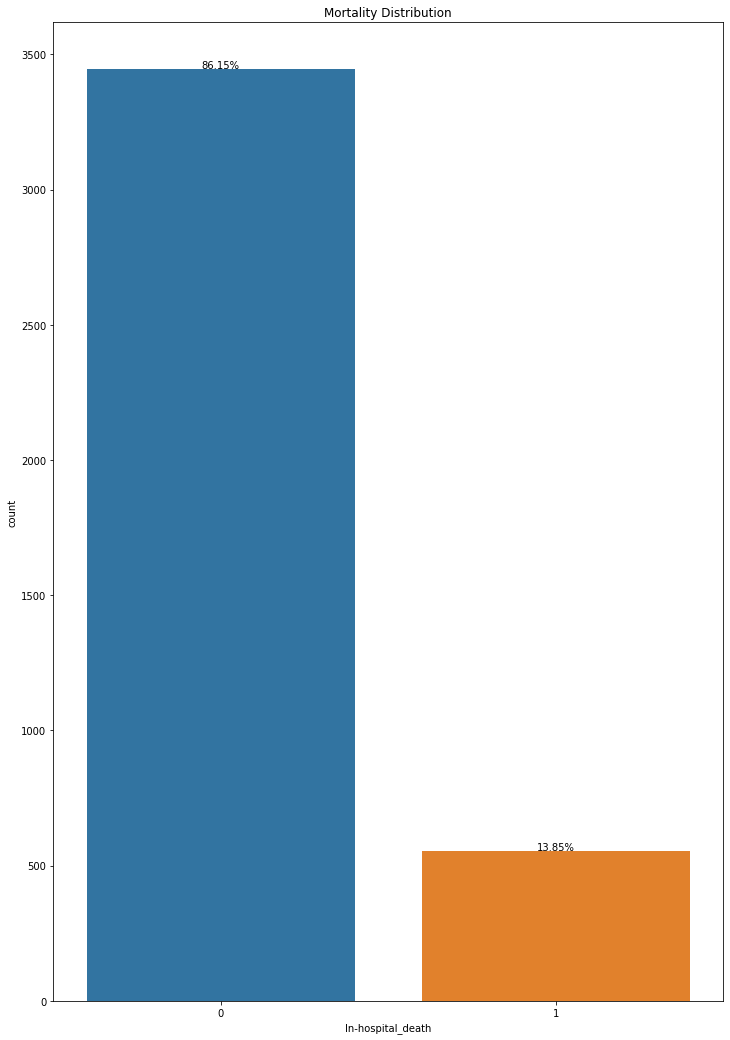

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,18))
ax=sns.countplot(train['In-hospital_death'])
plt.title('Mortality Distribution')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0, height+3,
    f"{round(100*height/len(train),2)}%",
    ha='center')

# Mortality Distribution by Gender

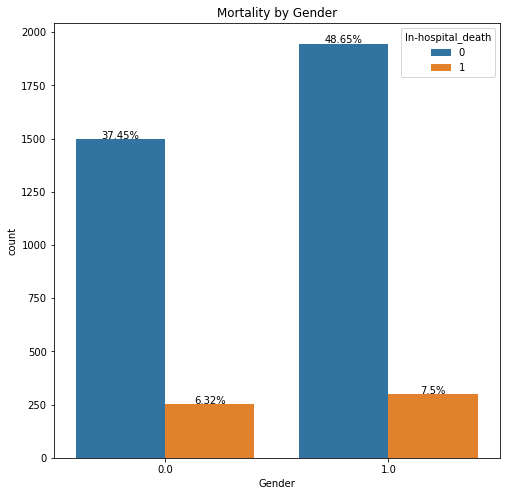

In [7]:
plt.figure(figsize = (8, 8))
plt.title('Mortality by Gender')
ax = sns.countplot(x = 'Gender', data = train, hue = 'In-hospital_death')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(train), 2)}%",
                ha = 'center')

* **Mortality is almost same in both male and female**

# Mortality Distribution by ICU TYPE

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



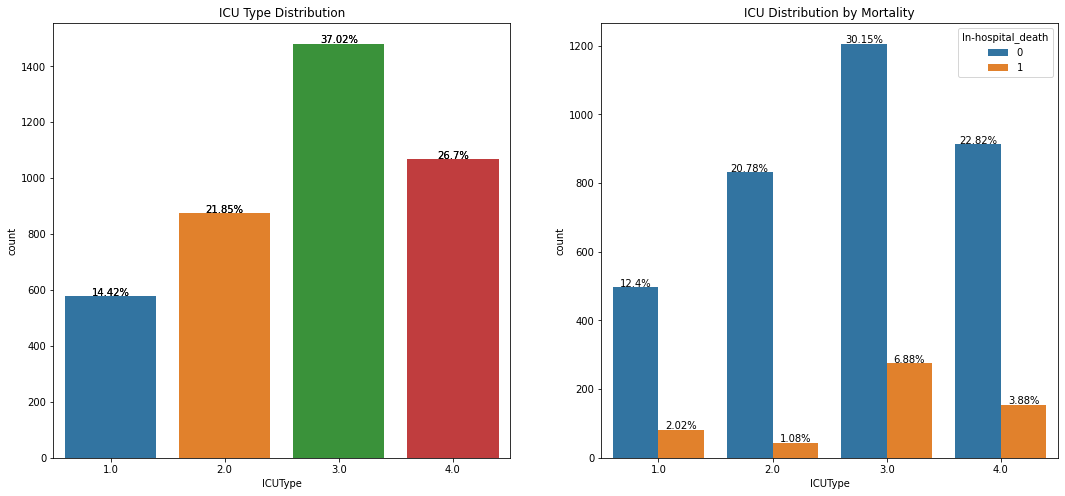

In [8]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(train['ICUType'])
plt.title('ICU Type Distribution')
ax=sns.countplot(x='ICUType',data=train)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height+3,f"{round(100*height/len(train),2)}%",ha='center')
    
plt.subplot(1,2,2)
plt.title('ICU Distribution by Mortality')
ax=sns.countplot(x='ICUType',data=train,hue='In-hospital_death')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height + 3,f"{round(100*height/len(train),2)}%",ha='center')
    

* **Mortality is higher in ICU Type 3.0 and 4.0.**

# Patient's Age Histogram

<AxesSubplot:title={'center':"Histogram Distribution of Patient's Age"}, xlabel='Age', ylabel='Count'>

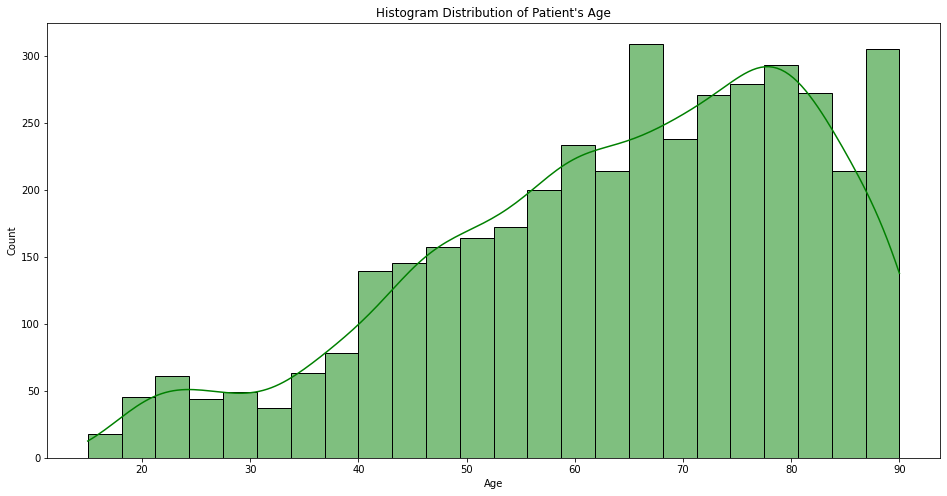

In [9]:
plt.figure(figsize=(16,8))
plt.title("Histogram Distribution of Patient's Age")
sns.histplot(train['Age'],color='green',kde=True)

* **Most of the ICU patients are higher in Age**

# **Mortality by Age Group**

In [10]:
round(410/4000,2)

0.1

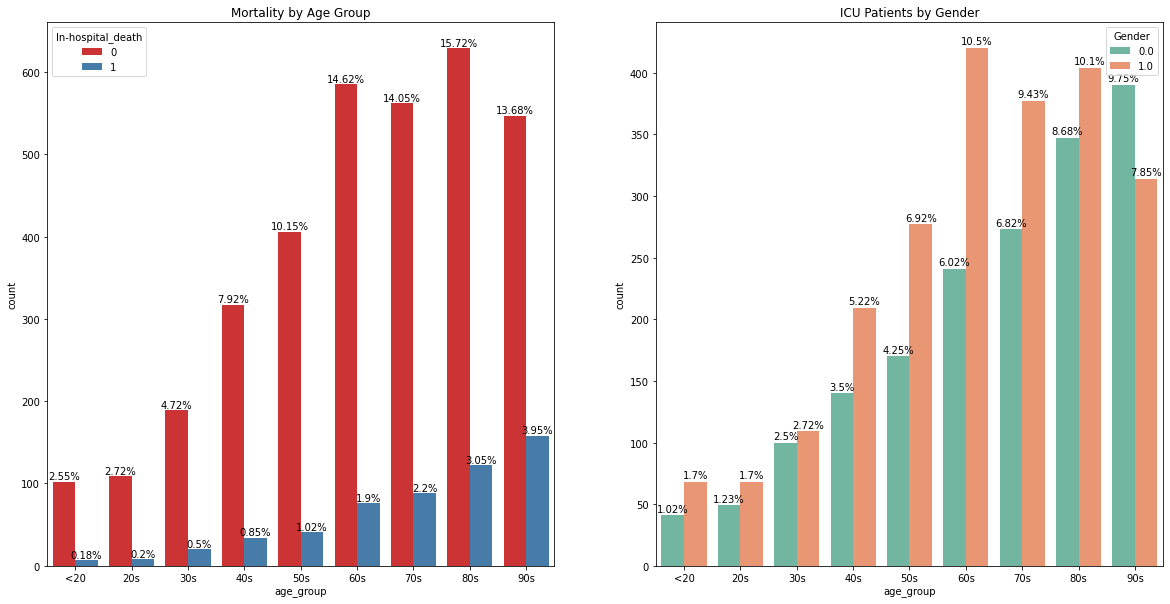

In [11]:
train['age_group']=pd.cut(train['Age'],bins=9,labels=['<20','20s','30s','40s','50s','60s','70s','80s','90s'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Mortality by Age Group')
ax=sns.countplot(x='age_group',data=train,hue='In-hospital_death',palette='Set1')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height+3,f"{round(100*height/len(train),2)}%",ha='center')
    
plt.subplot(1,2,2)
plt.title('ICU Patients by Gender')
ax=sns.countplot(x='age_group',data=train,hue='Gender',palette='Set2')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+ p.get_width()/2.0,height+3,f"{round(100 * height/len(train),2)}%",ha='center')

* **Mortality is more for patients in higher age group.**
* **More male patients are in ICU than Female patient.**

# Height and Weight data distribution along with mean/median

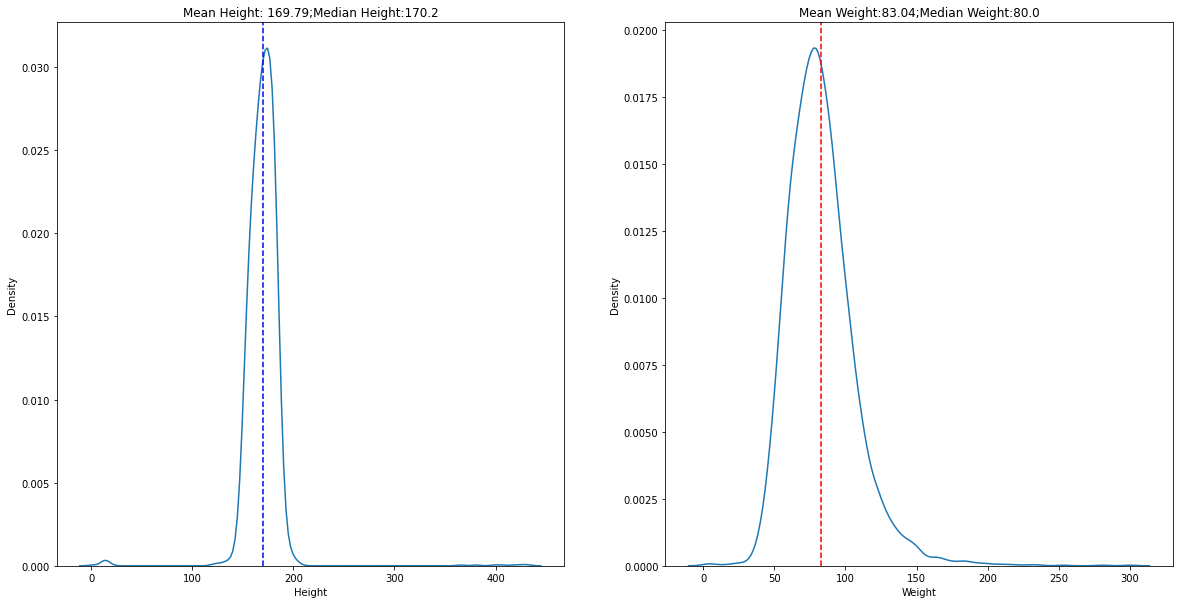

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title(f"Mean Height: {round(train['Height'].mean(),2)};Median Height:{train['Height'].median()}")
ax=sns.kdeplot(x='Height',data=train)
ax.axvline(train['Height'].mean(),ls='--',color='b')

plt.subplot(1,2,2)
plt.title(f"Mean Weight:{round(train['Weight'].mean(),2)};Median Weight:{train['Weight'].median()}")
ax=sns.kdeplot(x='Weight',data=train)
ax.axvline(train['Weight'].mean(),ls='--',color='r')

# Calculating the BMI Index

* Now we calculate the Body Mass Index (BMI) of patients to check how it affects their mortality
* To calculate the BMI of patients in ICU we need impute NaNs in Height and Weight features
* We impute using their Median value
* The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
* Height in our dataset is in cm (centimeters) so the formula is weight (kg) / [height (cm)]^2 x 10,000

In [13]:
#using median because the data is skewed and it is more resistant to outliers than mean
train['Height']=train['Height'].fillna(train['Height'].median())
train['Weight']=train['Weight'].fillna(train['Weight'].median())
train['bmi']=train.apply(lambda x:round((x['Weight']/(x['Height']**2))*10000,2),axis=1)
train['bmi_group']=pd.cut(train['bmi'],bins=[train['bmi'].min(),18.5,24.9,29.9,train['bmi'].max()],
                         labels=['Underweight','Healthy','Overweight','Obesity'])
del train['bmi']


In [14]:
train.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,137021.0,66.0,1.0,177.8,102.00,117.50,113.41,37.23,56.61,NaN,...,209.00,NaN,4.25,137.00,NaN,15.00,2.0,0,70s,Obesity
1,133611.0,50.0,1.0,170.2,92.40,210.51,85.93,38.04,58.60,126.69,...,243.33,88.02,4.38,144.00,0.51,6.88,4.0,0,50s,Obesity
2,137860.0,40.0,1.0,185.4,81.80,467.41,98.83,36.83,57.88,157.63,...,143.33,108.53,4.33,139.67,0.55,7.65,4.0,0,30s,Healthy
3,134781.0,58.0,1.0,180.3,99.22,86.55,81.63,36.96,49.64,113.86,...,109.60,78.06,4.07,137.75,0.58,13.50,2.0,0,60s,Obesity
4,133534.0,80.0,1.0,170.2,73.00,194.12,71.86,37.10,72.85,NaN,...,NaN,NaN,NaN,NaN,NaN,15.00,3.0,0,80s,Overweight


# BMI Distribution by Mortality and Gender

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



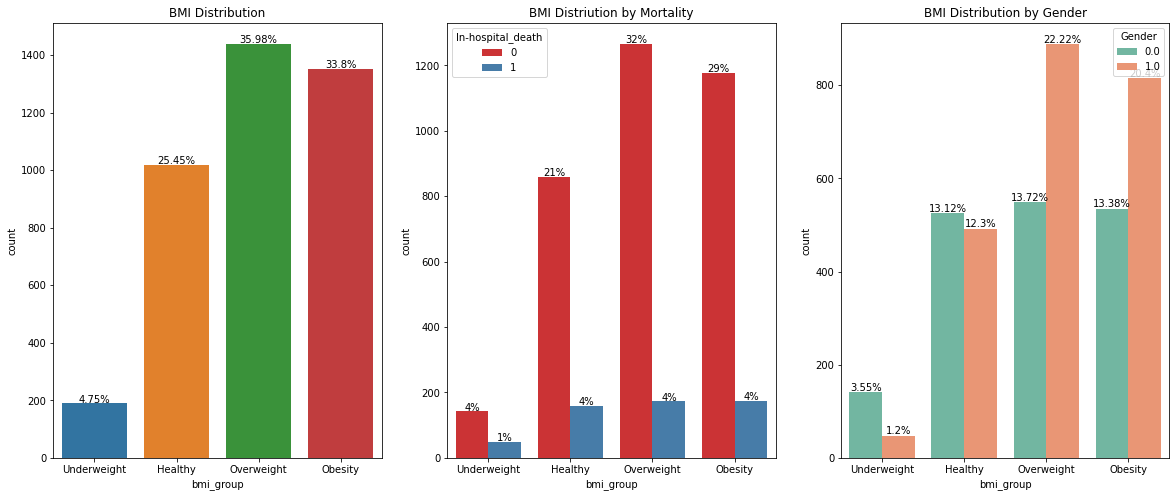

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('BMI Distribution')
ax=sns.countplot(train['bmi_group'])
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height+3,f"{round(100*height/len(train),2)}%",ha='center')
    
plt.subplot(1,3,2)
plt.title('BMI Distriution by Mortality')
ax=sns.countplot(x='bmi_group',data=train,hue='In-hospital_death',palette='Set1')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,f"{round(100*height/len(train))}%",ha='center')
    
plt.subplot(1,3,3)
plt.title("BMI Distribution by Gender")
ax=sns.countplot(x='bmi_group',data=train,hue='Gender',palette='Set2')
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,f"{round(100*height/len(train),2)}%",ha="center")

    
    


* Around 70% patients admitted are in bmi index Overweight and Obese.
* Mortality is higher in the same bmi index group.
* More male patients than female in higher bmi index.

In [16]:
train.columns

Index(['RecordID', 'Age', 'Gender', 'Height', 'Weight', 'Urine', 'HR', 'Temp',
       'NIDiasABP', 'SysABP', 'DiasABP', 'pH', 'PaCO2', 'PaO2', 'Platelets',
       'MAP', 'K', 'Na', 'FiO2', 'GCS', 'ICUType', 'In-hospital_death',
       'age_group', 'bmi_group'],
      dtype='object')

In [17]:
train['In-hospital_death'].value_counts()

0    3446
1     554
Name: In-hospital_death, dtype: int64

# Histogram Distribution of Urine Parameter

Text(0.7, 0.95, 'Mean:139.87')

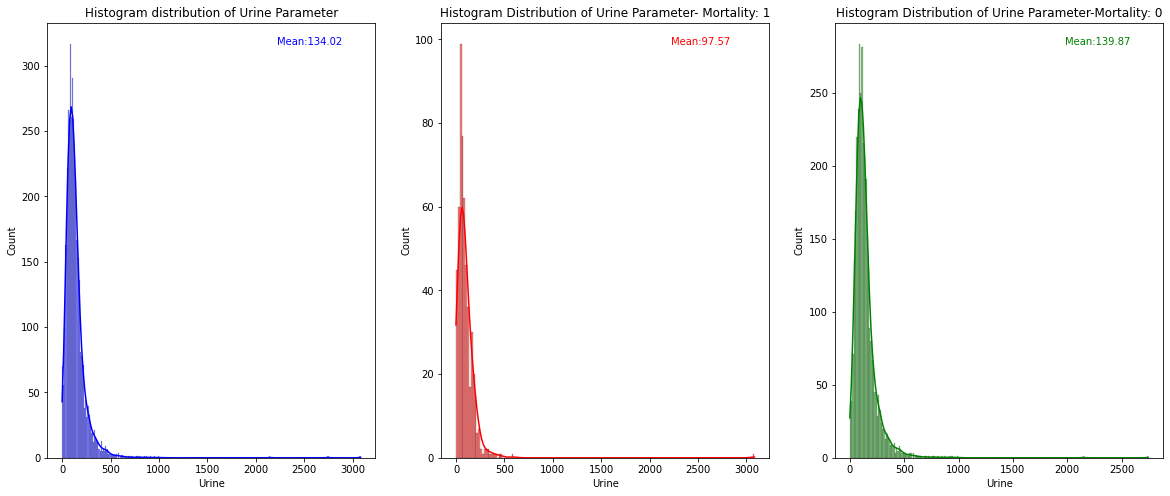

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('Histogram distribution of Urine Parameter')
sns.histplot(train['Urine'],color='blue',kde=True)
plt.annotate(f"Mean:{round(train['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='blue')

plt.subplot(1,3,2)
plt.title('Histogram Distribution of Urine Parameter- Mortality: 1')
sns.histplot(train[train['In-hospital_death']==1]['Urine'],color='red',kde=True)
plt.annotate(f"Mean:{round(train[train['In-hospital_death']==1]['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='red')

plt.subplot(1,3,3)
plt.title('Histogram Distribution of Urine Parameter-Mortality: 0')
sns.histplot(train[train['In-hospital_death']==0]['Urine'],color='green',kde=True)
plt.annotate(f"Mean:{round(train[train['In-hospital_death']==0]['Urine'].mean(),2)}",xy=(0.7,0.95),xycoords='axes fraction',color='green')

# Categorical Features and Numerical Features

In [19]:
cat_features=['Gender','ICUType','age_group','bmi_group']
num_features=[c for c in train.columns if c not in cat_features]
num_features=[c for c in num_features if c not in ['RecordID','In-hospital_death']]
cat_features,num_features

(['Gender', 'ICUType', 'age_group', 'bmi_group'],
 ['Age',
  'Height',
  'Weight',
  'Urine',
  'HR',
  'Temp',
  'NIDiasABP',
  'SysABP',
  'DiasABP',
  'pH',
  'PaCO2',
  'PaO2',
  'Platelets',
  'MAP',
  'K',
  'Na',
  'FiO2',
  'GCS'])

In [20]:
print(len(num_features))


18


# Boxplot to visualize data distribution in terms of 5 point summery and outliers**

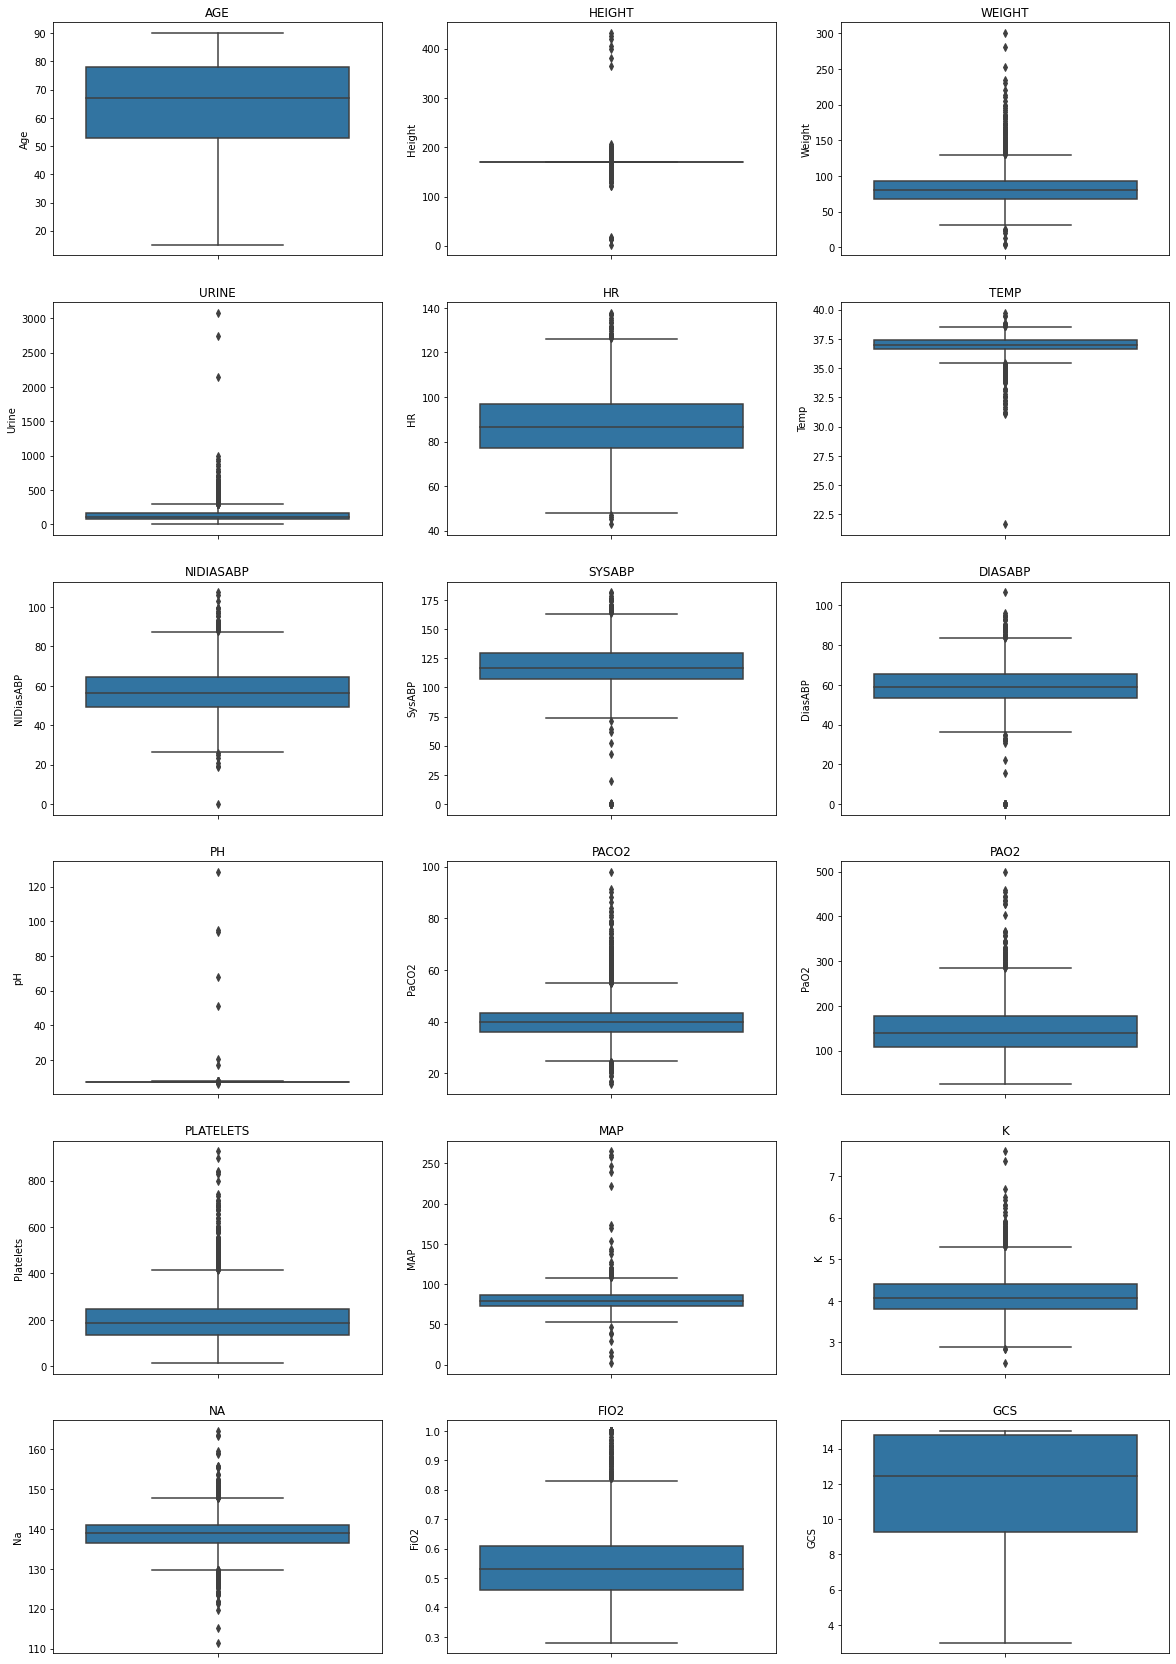

In [21]:
plt.figure(figsize=(20,30))
for i,col in enumerate(train[num_features]):
    plt.subplot(6,int(len(num_features)/6), i+1)
    sns.boxplot(y=col,data=train)
    plt.title(col.upper())

Most of the features have outliers

In [22]:
train.isnull().sum()

RecordID                0
Age                     0
Gender                  3
Height                  0
Weight                  0
Urine                 117
HR                     63
Temp                   64
NIDiasABP             517
SysABP               1201
DiasABP              1201
pH                    960
PaCO2                 977
PaO2                  977
Platelets              68
MAP                  1208
K                      96
Na                     75
FiO2                 1283
GCS                    64
ICUType                 0
In-hospital_death       0
age_group               0
bmi_group               1
dtype: int64

# Imputing NaN Values

We can impute all the NaN Values with the respective feature's mean value.
But here we impute NaNs depending on the 'In-hospital_death' value.

In [23]:
df_0=train[train['In-hospital_death']==0].copy()
df_1=train[train['In-hospital_death']==1].copy()

#Impute numerical features with mean values
df_0[num_features]=df_0[num_features].fillna(df_0[num_features].mean())
df_1[num_features]=df_1[num_features].fillna(df_1[num_features].mean())

#impute categorical features with mean values
df_0[cat_features]=df_0[cat_features].fillna(df_0[cat_features].mode())
df_1[cat_features]=df_1[cat_features].fillna(df_1[cat_features].mode())


In [24]:
#concat both the dataframes, suffle and reset index

df=pd.concat([df_0,df_1],axis=0).sample(frac=1).reset_index(drop=True)
df.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,141440.0,60.0,1.0,177.8,91.50,169.870000,80.47000,36.770000,67.330000,116.040000,...,172.75,74.980000,4.05,139.50,0.470000,8.380000,2.0,0,60s,Overweight
1,134223.0,33.0,0.0,170.2,65.00,352.290000,101.02000,37.440000,57.759015,116.410000,...,100.50,90.070000,4.18,148.44,0.440000,10.560000,3.0,0,30s,Healthy
2,135059.0,90.0,0.0,170.2,80.00,139.867253,86.72794,36.973782,57.759015,119.056707,...,27.20,81.216815,4.97,139.67,0.546648,11.938905,2.0,0,90s,Overweight
3,135910.0,56.0,1.0,170.2,99.46,146.220000,94.03000,36.330000,76.000000,123.510000,...,175.00,94.970000,4.47,141.60,0.670000,11.730000,3.0,0,50s,Obesity
4,135674.0,40.0,1.0,177.8,70.00,95.280000,72.52000,37.000000,69.780000,119.056707,...,195.00,81.216815,4.00,141.50,0.560000,11.760000,4.0,0,30s,Healthy


In [25]:
df.shape

(4000, 24)

In [26]:
print('Feature Correlation with Target:')
df.corr()['In-hospital_death']

Feature Correlation with Target:


RecordID            -0.011532
Age                  0.130700
Gender              -0.015689
Height              -0.013628
Weight              -0.054590
Urine               -0.124613
HR                   0.073804
Temp                -0.060020
NIDiasABP           -0.092156
SysABP              -0.066522
DiasABP             -0.075264
pH                   0.027736
PaCO2               -0.095989
PaO2                -0.100565
Platelets           -0.021218
MAP                 -0.032995
K                    0.022389
Na                   0.022402
FiO2                 0.052473
GCS                 -0.256609
ICUType              0.059896
In-hospital_death    1.000000
Name: In-hospital_death, dtype: float64

# Label Encoding and Standard Scaling

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in ['Gender','ICUType','age_group','bmi_group']:
    print(f"Label Encoding: {col} -{df[col].nunique()}")
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

Label Encoding: Gender -2
Label Encoding: ICUType -4
Label Encoding: age_group -9
Label Encoding: bmi_group -4


In [28]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df[num_features]=std.fit_transform(df[num_features])

In [29]:
df.head()

,RecordID,Age,Gender,Height,Weight,Urine,HR,Temp,NIDiasABP,SysABP,...,Platelets,MAP,K,Na,FiO2,GCS,ICUType,In-hospital_death,age_group,bmi_group
0,141440.0,-0.241902,1,0.534089,0.375382,0.305869,-0.461563,-0.256135,0.913046,-0.155726,...,-0.318115,-0.522349,-0.174373,0.158233,-0.757629,-0.998848,1,0,4,2
1,134223.0,-1.779597,0,0.014848,-0.770372,1.861797,0.956955,0.665115,0.036951,-0.133355,...,-1.023679,0.773486,0.092419,2.364500,-1.045932,-0.323981,2,0,1,0
2,135059.0,1.466648,0,0.014848,-0.121832,0.049964,-0.029592,0.024065,0.036951,0.026672,...,-1.739497,0.013230,1.713692,0.200186,-0.021040,0.102889,1,0,7,2
3,135910.0,-0.469709,1,0.014848,0.719541,0.104149,0.474452,-0.861136,1.706669,0.295931,...,-0.296142,1.194268,0.687570,0.676483,1.164387,0.038218,2,0,3,1
4,135674.0,-1.380935,1,0.534089,-0.554192,-0.330337,-1.010333,0.060115,1.137311,0.026672,...,-0.100831,0.013230,-0.276985,0.651805,0.107278,0.047505,3,0,1,0


In [30]:
X=df.drop(['RecordID','In-hospital_death'],axis=1)
y=df['In-hospital_death'].copy()

# Train, Test Split

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [32]:
X_train.shape

(3200, 22)

In [33]:
X_test.shape

(800, 22)

# Building the model usig ANN

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(22,),activation='relu'),
        keras.layers.Dense(40,activation='relu'),
        keras.layers.Dense(80,activation='relu'),
        keras.layers.Dense(40,activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')            
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)

    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
        
    print(model.evaluate(X_test,y_test))

    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    
    print('Classification Report :\n',classification_report(y_test,y_pred))

    return y_pred

# Training the Model

In [36]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',0)

2022-04-14 13:33:36.420307: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-14 13:33:36.597819: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8388
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8584
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8619
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8659
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8734
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8759
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8822
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8828
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8828
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2903 - accura

# Imbalanced Dataset Handling

Due to imbalanced dataset, precision, recal and f1 score for Class 1 is not acceptable.
We need to have approximately equal no of records for both the classes for the model to perform best.
Hence , we need to balance the dataset using sampling techniques for better model performance.

In [37]:
inhospitaldeath_0,inhospitaldeath_1=df['In-hospital_death'].value_counts()

In [38]:
inhospitaldeath_0

3446

In [39]:
inhospitaldeath_1

554

In [40]:
df_0=df[df['In-hospital_death']==0]
df_1=df[df['In-hospital_death']==1]

In [41]:
df_0.shape

(3446, 24)

In [42]:
inhospitaldeath_0,inhospitaldeath_1

(3446, 554)

# Applying Oversampling Method to balance the dataset

In [43]:
df_1_over=df_1.sample(inhospitaldeath_0,replace=True)

In [44]:
df_1_over['In-hospital_death'].value_counts()

1    3446
Name: In-hospital_death, dtype: int64

In [45]:
df_0['In-hospital_death'].value_counts()

0    3446
Name: In-hospital_death, dtype: int64

In [46]:
df_oversamp=pd.concat([df_0,df_1_over],axis=0)
df_oversamp['In-hospital_death'].value_counts()

0    3446
1    3446
Name: In-hospital_death, dtype: int64

In [47]:
X=df_oversamp.drop(['RecordID','In-hospital_death'],axis=1)
y=df_oversamp['In-hospital_death']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [49]:
X_train.shape

(5513, 22)

In [50]:
X_test.shape

(1379, 22)

In [51]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
173/173 [==============================] - 1s 3ms/step - loss: 0.6010 - accuracy: 0.6713
Epoch 2/100
173/173 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7578
Epoch 3/100
173/173 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7816
Epoch 4/100
173/173 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.8057
Epoch 5/100
173/173 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8141
Epoch 6/100
173/173 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8221
Epoch 7/100
173/173 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8338
Epoch 8/100
173/173 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8516
Epoch 9/100
173/173 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8609
Epoch 10/100
173/173 [==============================] - 0s 3ms/step - loss: 0.3014 - accura

**We can also apply SMOTE Method and compare the classification report to select the best performing approach.**